<a href="https://colab.research.google.com/github/atriap/Finding_the_Efficient_Frontier_using_Monte_Carlo_simulations/blob/main/Finding_the_Efficient_Frontier_using_Monte_Carlo_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
pip install yfinance

In [ ]:
pip install pyfolio

## Basic 1/n Portfolio

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

In [ ]:
RISKY_ASSETS = ['MYOR.JK', 'INDF.JK']
START_DATE = '2020-01-01'
END_DATE = '2021-05-01'
n_assets = len(RISKY_ASSETS)

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  2 of 2 completed


In [ ]:
returns = prices_df['Adj Close'].pct_change().dropna()

In [ ]:
portfolio_weights = n_assets * [1 / n_assets]

In [ ]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
index=returns.index)

Start date,2020-01-03
End date,2021-04-30
Total months,15
,Backtest
Annual return,3.7%
Cumulative returns,4.8%
Annual volatility,34.6%
Sharpe ratio,0.27
Calmar ratio,0.11
Stability,0.52
Max drawdown,-35.2%


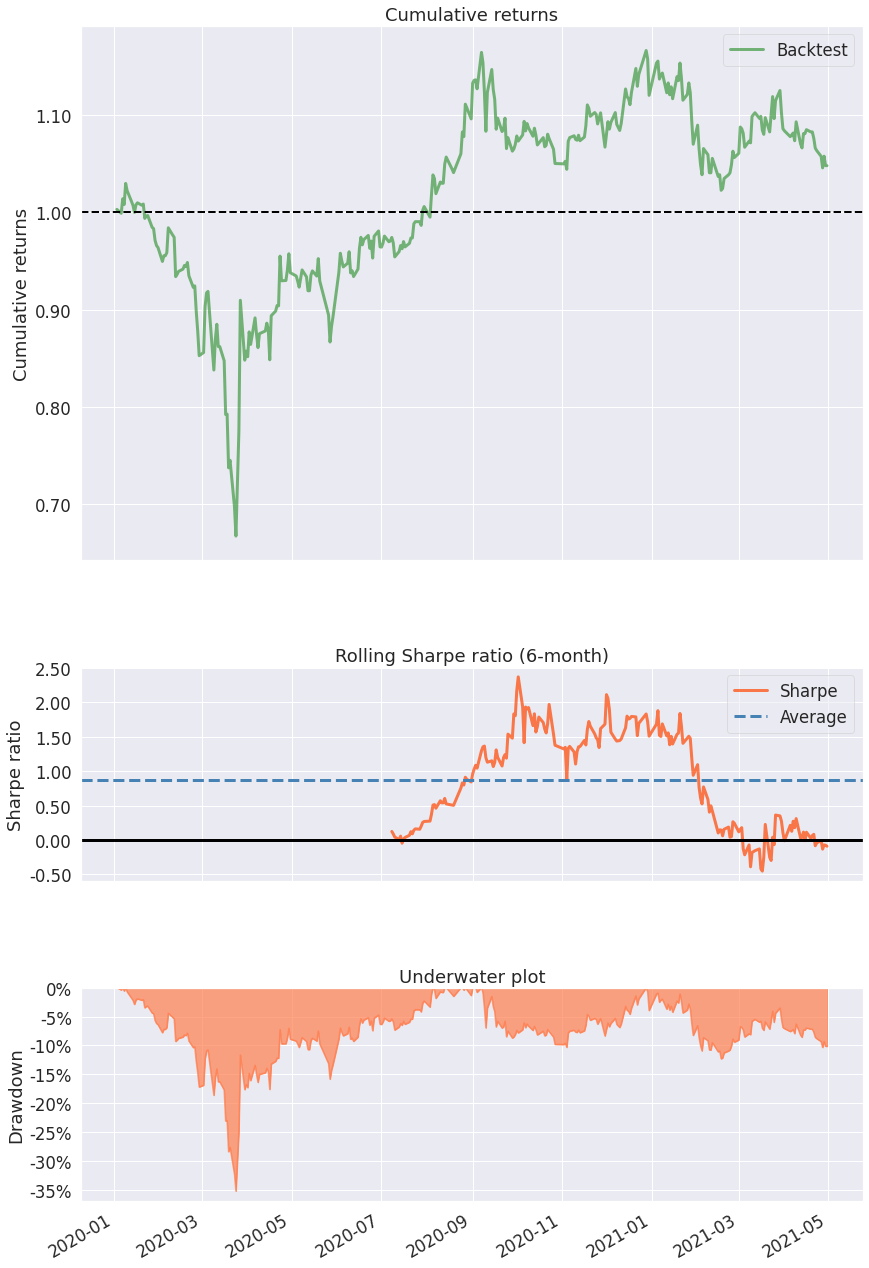

In [ ]:
pf.create_simple_tear_sheet(portfolio_returns)

## Finding the Efficient Frontier using Monte Carlo simulations

In [ ]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['MYOR.JK', 'INDF.JK']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'
n_assets = len(RISKY_ASSETS)

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  2 of 2 completed


Calculate annualized average returns and the corresponding standard deviation:

In [ ]:
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

Simulate random portfolio weights:

In [ ]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [ ]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
  portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [ ]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
'volatility': portf_vol,
'sharpe_ratio':
portf_sharpe_ratio})

In [ ]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
                            portf_results_df.returns.max(),
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
  if portf_rtns_ef[point_index] not in portf_rtns: 
    indices_to_skip.append(point_index)
    continue
  matched_ind = np.where(portf_rtns ==
                       portf_rtns_ef[point_index])
  portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

In [ ]:
import matplotlib.pyplot as plt


Plot the Efficient Frontier:

ValueError: ignored

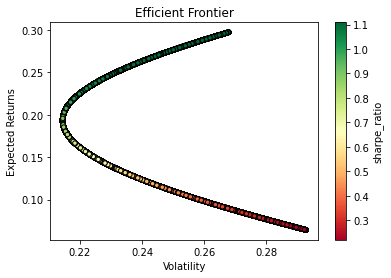

In [ ]:
MARKS = ['o', 'X', 'd', '*']
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio', 
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility',
ylabel='Expected Returns',
title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
  ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
             y=avg_returns[asset_index],
             marker=MARKS[asset_index],
             s=150,
             color='black',
             label=RISKY_ASSETS[asset_index])
ax.legend()

In [ ]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['CAMP.JK', 'ICBP.JK', 'MYOR.JK', 'INDF.JK']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'
n_assets = len(RISKY_ASSETS)

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  4 of 4 completed


In [ ]:
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [ ]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [ ]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
  portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [ ]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
'volatility': portf_vol,
'sharpe_ratio':
portf_sharpe_ratio})

In [ ]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
                            portf_results_df.returns.max(),
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
  if portf_rtns_ef[point_index] not in portf_rtns: 
    indices_to_skip.append(point_index)
    continue
  matched_ind = np.where(portf_rtns ==
                       portf_rtns_ef[point_index])
  portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

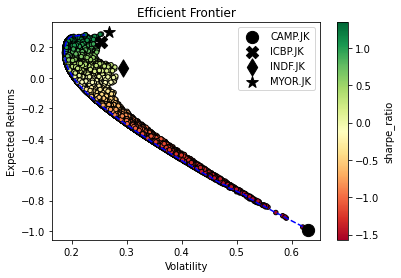

In [ ]:
MARKS = ['o', 'X', 'd', '*']
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio', 
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility',
ylabel='Expected Returns',
title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
  ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
             y=avg_returns[asset_index],
             marker=MARKS[asset_index],
             s=150,
             color='black',
             label=RISKY_ASSETS[asset_index])
ax.legend()